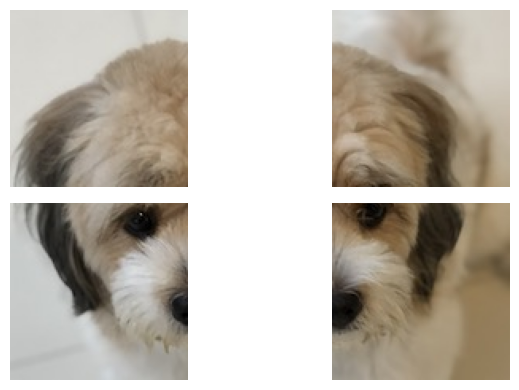

In [3]:
# Patchify an image using einops
import matplotlib.pyplot as plt
import numpy as np
from einops import rearrange

# Load an image (update path if needed)
img = plt.imread('../lecture_notes/toolkit/demo/assets/aki_dog.jpg')

# Split into 2x2 patches
p1, p2 = 2, 2
patches = rearrange(img, '(p1 h) (p2 w) c -> (p1 p2) h w c', p1=p1, p2=p2)

# Display the patches
_, ax = plt.subplots(p1, p2, figsize=(8, 4), sharex=True, sharey=True)
for i in range(p1):
    for j in range(p2):
        ax[i][j].imshow(patches[i * p2 + j])
        ax[i][j].axis('off')
plt.tight_layout()
plt.show()

Original Image shape: (224, 224, 3)
Downsampled Image shape: (112, 112, 3)


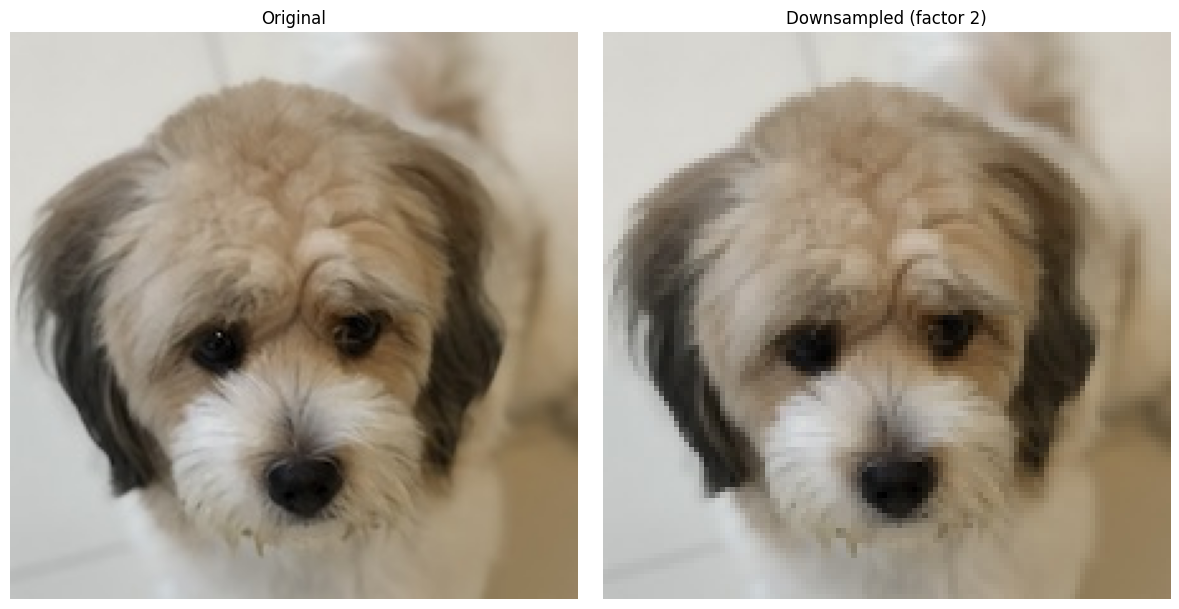

In [15]:
# Downsample an image by a factor of 2 using einops
from einops import reduce
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('../lecture_notes/toolkit/demo/assets/aki_dog.jpg')
print("Original Image shape:", img.shape)

# Convert to float32 for reduce operation (needed for mean)
img_float = img.astype(np.float32)

# Downsample by factor of 2
factor = 2
img_down = reduce(img_float, '(h f1) (w f2) c -> h w c', 'mean', f1=factor, f2=factor)

# Convert back to uint8 for display
img_down = img_down.astype(np.uint8)
print("Downsampled Image shape:", img_down.shape)

# Display original and downsampled images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(img_down)
axes[1].set_title(f'Downsampled (factor {factor})')
axes[1].axis('off')
plt.tight_layout()
plt.show()

Original Image shape: (224, 224, 3)
Upsampled Image shape: (448, 448, 3)


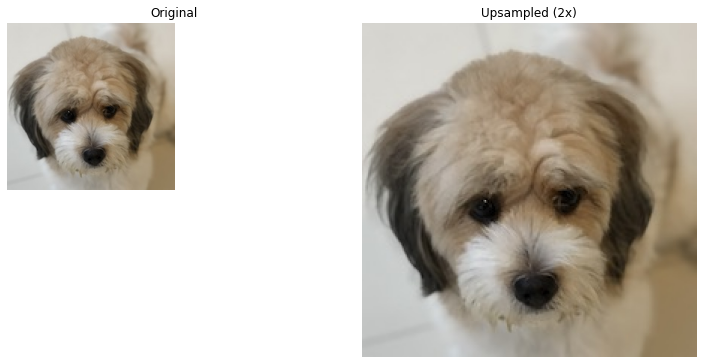

In [11]:
# Downsample an image with einops (average pooling), then plot before/after

from einops import reduce, rearrange
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

# Load one of the demo images
img = plt.imread('../lecture_notes/toolkit/demo/assets/aki_dog.jpg')
print("Original shape:", img.shape)

# Ensure 3 channels and crop so H, W are divisible by the scale
s = 4  # downsample factor (try 2, 4, 8)
H, W = img.shape[:2]
Hc, Wc = (H // s) * s, (W // s) * s
img = img[:Hc, :Wc]
if img.ndim == 2:
    img = np.repeat(img[..., None], 3, axis=-1)   # grayscale -> RGB
else:
    img = img[:, :, :3]  # keep RGB if there's an alpha

# Convert to float in [0, 1] for a clean mean
img_f = img.astype(np.float32)
if img_f.max() > 1.0:
    img_f /= 255.0

# Downsample by s using block-mean pooling:
# (H, W, C) -> (H/s, W/s, C)
down = reduce(img_f, '(h s) (w s) c -> h w c', 'mean', s=s)

# Plot before and after
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=72)
ax[0].imshow(img_f);  ax[0].set_title(f'Original (cropped) {Hc}×{Wc}'); ax[0].axis('off')
ax[1].imshow(down);   ax[1].set_title(f'Downsampled ×{s} → {Hc//s}×{Wc//s}'); ax[1].axis('off')
plt.tight_layout(); plt.show()


Original shape: (224, 224, 3)


EinopsError:  Error while processing mean-reduction pattern "(h s) (w s) c -> h w c".
 Input tensor shape: (224, 224, 3). Additional info: {'s': 4}.
 Indexing expression contains duplicate dimension "s"

Dog Image shape: (224, 224, 3)
Cat Image shape: (224, 224, 3)


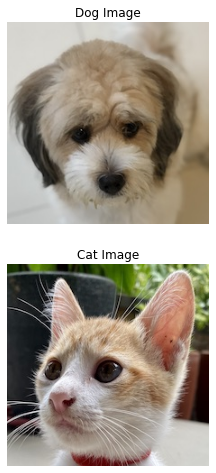

Combined shape: (2, 224, 224, 3)


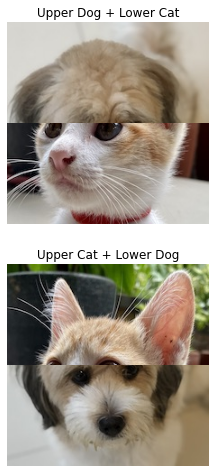

In [16]:
# Pack two images together using einops (following einops_demo.ipynb)
import matplotlib.pyplot as plt
import numpy as np
from einops import rearrange

# Load two images
img1 = plt.imread('../lecture_notes/toolkit/demo/assets/aki_dog.jpg')
img2 = plt.imread('../lecture_notes/toolkit/demo/assets/wonder_cat.jpg')

print("Dog Image shape:", img1.shape)
print("Cat Image shape:", img2.shape)

# Display original images
_, ax = plt.subplots(nrows=2, ncols=1, figsize=(4, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(img1)
ax[0].set_title('Dog Image')
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].set_title('Cat Image')
ax[1].axis('off')
plt.show()

# Put together the two images into a single tensor
imgs = np.array([img1, img2])
print("Combined shape:", imgs.shape)

# Following the einops demo pattern for mixing images:
# Arrange as a 2D array of upper half/lower half of images
imgs = rearrange(imgs, "b (k h) w c -> k b h w c", k=2)

# Reverse the order of the lower half of images
imgs = np.concatenate([imgs[::2], imgs[1::2,::-1]], axis=0)

# Combine the new upper and lower half of images
imgs = rearrange(imgs, "i j h w c -> j (i h) w c")

# Display the mixed images
_, ax = plt.subplots(nrows=2, ncols=1, figsize=(4, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(imgs[0])
ax[0].set_title('Upper Dog + Lower Cat')
ax[0].axis('off')
ax[1].imshow(imgs[1])
ax[1].set_title('Upper Cat + Lower Dog')
ax[1].axis('off')
plt.show()